In [1]:
#Read datasets
import pandas as pd
filepath = 'datapaper/'
#EGF data
# data0 = pd.read_csv(filepath+'dataegf.csv')
# data1 = pd.read_csv(filepath+'dataegfintAKT0.csv')
# data0['Condition'] = 0
# data1['Condition'] = 1
# data = pd.concat([data0, data1], ignore_index=True)

# Melanoma data
# data = pd.read_csv(filepath+'meldataclean.csv')
# data = data.drop('Unnamed: 0',axis=1)
# data.rename(columns={'BioReplicate': 'Condition'}, inplace=True)

# PDAC data
# data = pd.read_csv(filepath+'pdacdata.csv')

data = pd.read_csv(filepath+'crc_silvia_data.csv')
condition_mapping = {'Healthy': 0, 'CRC': 1}
# Replace values in the "Condition" column
data['Condition'] = data['Condition'].replace(condition_mapping)
data.head()

,A1AG2,AFM,AHSG,ANT3,AOC3,APOB,ATRN,BTD,C20orf3,CADM1,...,Q5JNX2,SERPINA1,SERPINA3,SERPINA6,SERPINA7,THBS1,TIMP1,VTN,VWF,Condition
0,14.238157,16.103019,19.951792,17.207936,10.032169,15.544774,14.383388,16.283071,10.667779,9.653029,...,19.028130,18.061091,14.218036,15.796849,13.581848,13.995686,11.578754,12.081352,10.661031,1
1,15.024111,16.020714,19.715919,17.297900,9.034144,15.131883,13.981723,16.249189,10.703279,9.624991,...,19.862536,17.610188,14.832327,15.815397,13.138445,13.707714,11.960974,12.838407,10.778432,1
2,15.631364,16.143800,19.710849,17.596254,10.381880,15.955302,14.635355,16.499158,11.183873,10.323191,...,19.501773,18.539972,15.308726,16.401770,13.742330,15.636962,12.155842,12.313155,11.185271,1
3,15.401365,16.276415,19.704377,17.422504,9.502960,15.714932,14.060700,16.277732,9.972982,9.994209,...,19.984664,17.401414,14.254241,16.310491,13.936894,15.517268,12.379265,10.679166,10.887855,1
4,16.003158,16.958207,20.420334,17.988199,9.648502,16.247330,14.203595,16.541422,12.581556,9.607492,...,20.467453,17.448008,16.231911,16.485833,14.167134,15.129106,12.169116,14.506106,11.254175,1


In [2]:
import pandas as pd
from scipy.stats import ttest_ind

# Assuming protein_data is your DataFrame with proteins as columns and conditions as a column

# Identify conditions in the dataset
conditions = data['Condition'].unique()

# Create a DataFrame to store t-test results
t_test_results = pd.DataFrame(index=data.columns[:-1])  # Exclude 'condition' column

# Iterate over conditions
for condition in conditions:
    # Select data for the current condition
    subset_data = data.loc[data['Condition'] == condition, data.columns[:-1]]

    # Perform t-test for each protein between conditions
    _, p_values = ttest_ind(subset_data, data.loc[data['Condition'] != condition, data.columns[:-1]])

    # Assign p-values to the results DataFrame
    t_test_results[condition] = p_values

# Set a significance level for the t-test (e.g., 0.05)
significance_level = 0.05

# Identify proteins with significant differences (below significance_level) in at least one condition
significant_proteins = t_test_results[t_test_results.le(significance_level).all(axis=1)].index
not_significant_proteins = t_test_results[t_test_results.gt(significance_level).all(axis=1)].index
# Display the results
print("Proteins with Significant Differences:")
print(significant_proteins)
print("Proteins with insignificant Differences:")
print(not_significant_proteins)

Proteins with Significant Differences:
Index(['CFH', 'CP', 'CTSD', 'FHR3', 'HP', 'LRG1', 'MMRN1', 'MRC2', 'ORM1',
       'SERPINA1', 'SERPINA3', 'TIMP1'],
      dtype='object')
Proteins with insignificant Differences:
Index(['A1AG2', 'AFM', 'AHSG', 'ANT3', 'AOC3', 'APOB', 'ATRN', 'BTD',
       'C20orf3', 'CADM1', 'CD163', 'CD44', 'CDH5', 'CFI', 'CLU',
       'DKFZp686N02209', 'DSG2', 'ECM1', 'F11', 'F5', 'FCGBP', 'FETUB', 'FGG',
       'FN1', 'HRG', 'HYOU1', 'ICAM1', 'IGFBP3', 'IGHA2', 'IGHG2', 'ITIH4',
       'KLKB1', 'KNG1', 'LAMP2', 'LCN2', 'LGALS3BP', 'LUM', 'LYVE1', 'MPO',
       'MST1', 'NCAM1', 'PGCP', 'PIGR', 'PLTP', 'PLXDC2', 'PON1', 'PRG4',
       'PROC', 'PTPRJ', 'Q5JNX2', 'SERPINA6', 'SERPINA7', 'THBS1', 'VTN',
       'VWF'],
      dtype='object')


In [3]:
t_test_results[0].values

array([7.60994837e-02, 2.62251217e-01, 7.85532600e-01, 9.63674220e-01,
       8.78586308e-01, 5.45278860e-01, 8.48440510e-01, 5.73848466e-01,
       7.36216851e-01, 7.40186481e-01, 3.30607934e-01, 5.24731394e-02,
       3.10062054e-01, 4.16765996e-02, 4.63138891e-01, 6.08387732e-01,
       3.56164918e-03, 3.17313378e-03, 8.63782003e-01, 1.63056636e-01,
       9.34837566e-02, 8.45416917e-01, 1.75128767e-01, 2.57790775e-01,
       7.46544626e-01, 3.88615052e-01, 1.56529430e-02, 3.58264144e-01,
       3.55730888e-04, 2.40445449e-01, 9.20544808e-02, 3.23091551e-01,
       8.26297164e-01, 6.69516462e-01, 3.37578607e-01, 8.76468099e-02,
       7.60609137e-01, 5.28319256e-01, 6.14346569e-02, 8.63052375e-01,
       7.05290758e-02, 2.04425301e-04, 4.19159422e-01, 3.77119884e-01,
       1.34861069e-04, 8.87968602e-01, 3.12461552e-02, 7.08748567e-01,
       3.67746178e-01, 2.42938902e-03, 9.88794640e-01, 8.70799414e-01,
       4.29350773e-01, 2.79392497e-01, 3.86129655e-01, 7.51512716e-01,
      

In [4]:
adjusted_p_values_matrix[0] < significance_level

NameError: name 'adjusted_p_values_matrix' is not defined

In [ ]:
t_test_results

In [19]:
t_test_results.le(significance_level)
t_test_results.gt(significance_level)

,0,1
EGFR,True,True
IGFR,True,True
SOS,True,True
Ras,True,True
PI3K,False,False
AKT,False,False
Raf,False,False
Mek,False,False
Erk,False,False


In [25]:
import pandas as pd
from scipy.stats import ttest_ind

# # Assuming protein_data is your DataFrame with proteins as columns and conditions as a column
# # Example ground truth
# ground_truth_dict = {
#     'ProteinA': [True, False, True],   # True means differentially abundant
#     'ProteinB': [False, True, False],
#     'ProteinC': [True, True, True],
# }

# ground_truth = pd.DataFrame(ground_truth_dict)
# ground_truth.index = ['Sample1', 'Sample2', 'Sample3']

# # Display the ground truth
# print("Ground Truth:")
# print(ground_truth_df)

# # Ground truth indicating true differential abundance (replace with your actual ground truth)
# # ground_truth = pd.Series(index=data.columns[:-1], dtype=bool)
# ground_truth.loc['ProteinA'] = True
# ground_truth.loc['ProteinB'] = False
# # ...
# simdata0 = pd.read_csv('egf/perprotein/egf_pp_0.csv')
# simdata1 = pd.read_csv('egf/perprotein/egfAKT0_pp_0.csv')
# simdata0 = pd.read_csv('egf/copula/egf_gm_copula_0.csv')
# simdata1 = pd.read_csv('egf/copula/egfAKT0_gm_copula_0.csv')
simdata0 = pd.read_csv('egf/tvae/egf_tvae_0.csv')
simdata1 = pd.read_csv('egf/tvae/egfAKT0_tvae_0.csv')

simdata0['Condition'] = 0
simdata1['Condition'] = 1
simdata = pd.concat([data0, data1], ignore_index=True)

# Create a DataFrame to store t-test results
simt_test_results = pd.DataFrame(index=data.columns[:-1])  # Exclude 'condition' column
for i in range(0,100):
    # Iterate over conditions
    for condition in conditions:
        # Select data for the current condition
        simsubset_data = simdata.loc[simdata['Condition'] == condition, simdata.columns[:-1]]

        # Perform t-test for each protein between conditions
        _, simp_values = ttest_ind(simsubset_data, simdata.loc[data['Condition'] != condition, simdata.columns[:-1]])

        # Assign p-values to the results DataFrame
        simt_test_results[condition] = simp_values

# Set a significance level for the t-test (e.g., 0.05)
significance_level = 0.05
# Apply Benjamini-Hochberg adjustment
rejected, adjusted_p_values, _, _ = multitest.multipletests(t_test_results.values.flatten(), alpha=significance_level, method='fdr_bh')

# Reshape the results to the original shape
adjusted_p_values_matrix = adjusted_p_values.reshape(t_test_results.shape)

# Identify proteins with significant differences after adjustment
significant_proteins = t_test_results.columns[adjusted_p_values_matrix[0] < significance_level]

# # Identify proteins with significant differences (below significance_level) in at least one condition
# simsignificant_proteins = simt_test_results[simt_test_results.le(significance_level).any(axis=1)].index

# Calculate TP, FP, TN, FN
# TP = sum(ground_truth[significant_proteins])
# FP = len(significant_proteins) - TP
# TN = len(ground_truth) - sum(ground_truth)
# FN = sum(~ground_truth[significant_proteins])

# # Display the results
# print("True Positives (TP):", TP)
# print("False Positives (FP):", FP)
# print("True Negatives (TN):", TN)
# print("False Negatives (FN):", FN)


In [26]:
simt_test_results.le(significance_level)

,0,1
EGFR,False,False
IGFR,False,False
SOS,False,False
Ras,False,False
PI3K,True,True
AKT,True,True
Raf,True,True
Mek,True,True
Erk,True,True


In [5]:
import numpy as np
from scipy.stats import ttest_ind

# Simulated data (replace with your actual data)
num_samples = 100
num_proteins = 10

real_data_condition_0 = np.random.normal(0, 1, (num_samples, num_proteins))
real_data_condition_1 = np.random.normal(1, 1, (num_samples, num_proteins))
simulated_data_condition_0 = np.random.normal(0.5, 1, (num_samples, num_proteins))
simulated_data_condition_1 = np.random.normal(1.5, 1, (num_samples, num_proteins))

# Set a significance threshold
threshold = 0.05

# Initialize variables for TP, FP, TN, FN
TP = FP = TN = FN = 0

# Determine differential abundance in real data
real_condition_0_differentially_abundant = np.array([ttest_ind(real_data_condition_0[:, i], np.zeros_like(real_data_condition_0[:, i])).pvalue < threshold for i in range(num_proteins)])
real_condition_1_differentially_abundant = np.array([ttest_ind(real_data_condition_1[:, i], np.zeros_like(real_data_condition_1[:, i])).pvalue < threshold for i in range(num_proteins)])

# Check if the same is true in the simulated data
simulated_condition_0_differentially_abundant = np.array([ttest_ind(simulated_data_condition_0[:, i], np.zeros_like(simulated_data_condition_0[:, i])).pvalue < threshold for i in range(num_proteins)])
simulated_condition_1_differentially_abundant = np.array([ttest_ind(simulated_data_condition_1[:, i], np.zeros_like(simulated_data_condition_1[:, i])).pvalue < threshold for i in range(num_proteins)])

# Calculate TP, FP, TN, FN
TP += np.sum(real_condition_0_differentially_abundant & simulated_condition_0_differentially_abundant)
FP += np.sum(~real_condition_0_differentially_abundant & simulated_condition_0_differentially_abundant)
TN += np.sum(~real_condition_0_differentially_abundant & ~simulated_condition_0_differentially_abundant)
FN += np.sum(real_condition_0_differentially_abundant & ~simulated_condition_0_differentially_abundant)

TP += np.sum(real_condition_1_differentially_abundant & simulated_condition_1_differentially_abundant)
FP += np.sum(~real_condition_1_differentially_abundant & simulated_condition_1_differentially_abundant)
TN += np.sum(~real_condition_1_differentially_abundant & ~simulated_condition_1_differentially_abundant)
FN += np.sum(real_condition_1_differentially_abundant & ~simulated_condition_1_differentially_abundant)

# Print the results
print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("True Negatives (TN):", TN)
print("False Negatives (FN):", FN)



True Positives (TP): 18
False Positives (FP): 0
True Negatives (TN): 2
False Negatives (FN): 0


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from statsmodels.stats import multitest

# Assuming protein_data_list is a list containing your 100 DataFrames

# Create a DataFrame to store p-values for each protein
p_values_df = pd.DataFrame()

# Iterate over each dataset
for idx, protein_data in enumerate(protein_data_list):
    # Identify conditions in the dataset
    conditions = protein_data['Condition'].unique()

    # Create a DataFrame to store t-test results for the current dataset
    t_test_results = pd.DataFrame(index=protein_data.columns[:-1])  # Exclude 'condition' column

    # Iterate over conditions
    for condition in conditions:
        # Select data for the current condition
        subset_data = protein_data.loc[protein_data['Condition'] == condition, protein_data.columns[:-1]]

        # Perform t-test for each protein between conditions
        _, p_values = ttest_ind(subset_data, protein_data.loc[protein_data['Condition'] != condition, protein_data.columns[:-1]])

        # Assign p-values to the results DataFrame
        t_test_results[condition] = p_values

    # Concatenate p-values for the current dataset to the overall DataFrame
    p_values_df = pd.concat([p_values_df, t_test_results], axis=1)

# Set a significance level for the t-test and multiple testing correction (e.g., 0.05)
significance_level = 0.05

# Apply Benjamini-Hochberg adjustment for each protein across all datasets
# rejected, adjusted_p_values, _, _ = multitest.multipletests(p_values_df.values.flatten(), alpha=significance_level, method='fdr_bh')

# # Reshape the results to the original shape
# adjusted_p_values_matrix = adjusted_p_values.reshape(p_values_df.shape)

# # Identify proteins with significant differences after adjustment
# significant_proteins = p_values_df.columns[adjusted_p_values_matrix[0] < significance_level]

# # Display the results
# print("Proteins with Significant Differences after Benjamini-Hochberg Adjustment:")
# print(significant_proteins)


In [6]:
real_condition_0_differentially_abundant

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [1]:
import numpy as np
from scipy.stats import ttest_ind

# Simulated data (replace with your actual data)
num_samples = 100
num_proteins = 10

real_data_condition_0 = np.random.normal(0, 1, (num_samples, num_proteins))
real_data_condition_1 = np.random.normal(1, 1, (num_samples, num_proteins))
simulated_data_condition_0 = np.random.normal(0.5, 1, (num_samples, num_proteins))
simulated_data_condition_1 = np.random.normal(1.5, 1, (num_samples, num_proteins))

# Set a significance threshold
threshold = 0.05

# Initialize variables for TP, FP, TN, FN
TP = FP = TN = FN = 0

# Perform t-test for each protein in each condition
for i in range(num_proteins):
    p_value_condition_0 = ttest_ind(real_data_condition_0[:, i], simulated_data_condition_0[:, i]).pvalue
    p_value_condition_1 = ttest_ind(real_data_condition_1[:, i], simulated_data_condition_1[:, i]).pvalue

    # Determine differential abundance based on p-values and threshold
    is_condition_0_differentially_abundant = p_value_condition_0 < threshold
    is_condition_1_differentially_abundant = p_value_condition_1 < threshold

    # Calculate TP, FP, TN, FN based on conditions
    TP += is_condition_0_differentially_abundant and is_condition_1_differentially_abundant
    FP += ~is_condition_0_differentially_abundant and is_condition_1_differentially_abundant
    TN += ~is_condition_0_differentially_abundant and ~is_condition_1_differentially_abundant
    FN += is_condition_0_differentially_abundant and ~is_condition_1_differentially_abundant

# Print the results
print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("True Negatives (TN):", TN)
print("False Negatives (FN):", FN)


True Positives (TP): 9
False Positives (FP): 0
True Negatives (TN): 0
False Negatives (FN): 1


In [13]:
ground_truth

,ProteinA,ProteinB,ProteinC
Sample1,True,False,True
Sample2,False,True,True
Sample3,True,False,True
ProteinA,True,True,True
ProteinB,False,False,False


In [41]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of proteins
num_proteins = 500

# Number of samples per condition
num_samples_per_condition = 50

# Number of conditions
num_conditions = 2

# List to store simulated datasets
protein_data_list = []

# Create 100 simulated datasets
for _ in range(100):
    # Simulate protein abundance data
    protein_abundance_data = pd.DataFrame({
        f'Protein_{i}': np.random.normal(loc=10, scale=2, size=num_samples_per_condition * num_conditions)
        for i in range(num_proteins)
    })

    # Create a condition column (0 or 1)
    protein_abundance_data['Condition'] = np.repeat([0, 1], num_samples_per_condition)

    # Append the simulated dataset to the list
    protein_data_list.append(protein_abundance_data)

# Display the first few rows of the first simulated dataset
print(protein_data_list[0].head())


   Protein_0  Protein_1  Protein_2  Protein_3  Protein_4  Protein_5  \
0  10.993428   7.169259  10.715575   8.342010   6.811145  11.852355   
1   9.723471   9.158709  11.121569   8.879638   8.801250  13.818833   
2  11.295377   9.314571  12.166102  11.494587  10.010487   7.202865   
3  13.046060   8.395445  12.107604  11.220741  10.093961  11.125938   
4   9.531693   9.677429   7.244661   9.958197   9.099869   8.698715   

   Protein_6  Protein_7  Protein_8  Protein_9  ...  Protein_491  Protein_492  \
0  11.513977   8.954554  11.876568  10.737347  ...    10.839373    11.205512   
1   8.155669  12.098018   8.967911   9.213322  ...    10.194764    11.598077   
2  11.739212   8.591313  10.192242  10.057490  ...     9.179767    11.953107   
3  12.711276   7.183077   9.075449  12.556904  ...    11.823287    11.197122   
4  10.826870   6.886742   9.131008  10.382198  ...    10.162338    10.501367   

   Protein_493  Protein_494  Protein_495  Protein_496  Protein_497  \
0     8.200062     8.4

In [43]:
#Read datasets
import pandas as pd
filepath = 'datapaper/'
#EGF data
# data0 = pd.read_csv(filepath+'dataegf.csv')
# data1 = pd.read_csv(filepath+'dataegfintAKT0.csv')
# data0['Condition'] = 0
# data1['Condition'] = 1
# data = pd.concat([data0, data1], ignore_index=True)

# Melanoma data
data = pd.read_csv(filepath+'meldataclean.csv')
data = data.drop('Unnamed: 0',axis=1)
data.rename(columns={'BioReplicate': 'Condition'}, inplace=True)

# PDAC data
# data = pd.read_csv(filepath+'pdacdata.csv')

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
real_data = data
num_columns = len(real_data.columns)-1

# Parameters
num_simulations = 99
alpha = 0.05
max_sample_size = 100
step_size = 5

# Initialize lists to store results
sample_sizes = list(range(5, max_sample_size + 1, step_size))
p_values_co = {col: [] for col in real_data.columns[:-1]}
p_values_pp = {col: [] for col in real_data.columns[:-1]}
p_values_tvae = {col: [] for col in real_data.columns[:-1]}

mean_p_values_co = {col: [] for col in real_data.columns[:-1]}
mean_p_values_pp = {col: [] for col in real_data.columns[:-1]}
mean_p_values_tvae = {col: [] for col in real_data.columns[:-1]}

# mel = pd.read_csv('dataegf.csv')
# mel = pd.read_csv('')
# data = pd.read_csv(filepath+'meldataclean.csv')
# data = data.drop('Unnamed: 0',axis=1)
# data.rename(columns={'BioReplicate': 'Condition'}, inplace=True)
# mel = mel.drop('Unnamed: 0',axis = 1)
# num_columns = len(mel.columns)-1

# Perform simulations with increasing sample size
for sample_size in sample_sizes:
    for _ in range(num_simulations):
        # Generate simulated data with balanced BioReplicate values
        num_samples_per_group = sample_size // 2


        # Perform a two-sample t-test between BioReplicate 0 and BioReplicate 1 for each column
        for col in real_data.columns[:-1]:
            simulated_data0_pp = pd.read_csv('mel/perprotein/mel0_pp_'+str(num_simulations)+'.csv')
            simulated_data1_pp = pd.read_csv('mel/perprotein/mel1_pp_'+str(num_simulations)+'.csv')
            simulated_data0_co = pd.read_csv('mel/copula/mel_gm_copula_'+str(num_simulations)+'.csv')
            simulated_data1_co = pd.read_csv('mel/copula/mel1_gm_copula_'+str(num_simulations)+'.csv')
            simulated_data0_tvae = pd.read_csv('mel/tvae/mel0_tvae_'+str(num_simulations)+'.csv')
            simulated_data1_tvae = pd.read_csv('mel/tvae/mel1_tvae_'+str(num_simulations)+'.csv')
            
            bio_replicate_0_pp = simulated_data0_pp[col][:sample_size]
            bio_replicate_1_pp = simulated_data1_pp[col][:sample_size]
            bio_replicate_0_co = simulated_data0_co[col][:sample_size]
            bio_replicate_1_co = simulated_data1_co[col][:sample_size]
            bio_replicate_0_tvae = simulated_data0_tvae[col][:sample_size]
            bio_replicate_1_tvae = simulated_data1_tvae[col][:sample_size]
            
            _, p_value_pp = stats.ttest_ind(bio_replicate_0_pp, bio_replicate_1_pp)
            p_values_pp[col].append(p_value_pp)
            _, p_value_co = stats.ttest_ind(bio_replicate_0_co, bio_replicate_1_co)
            p_values_co[col].append(p_value_co)
            _, p_value_tvae = stats.ttest_ind(bio_replicate_0_tvae, bio_replicate_1_tvae)
            p_values_tvae[col].append(p_value_tvae)

            # Calculate the mean p-value for each column at the current sample size
    for col in real_data.columns[:-1]:
        mean_p_value_pp = np.mean(p_values_pp[col])
        mean_p_values_pp[col].append(mean_p_value_pp)
        mean_p_value_co = np.mean(p_values_co[col])
        mean_p_values_co[col].append(mean_p_value_co)
        mean_p_value_tvae = np.mean(p_values_tvae[col])
        mean_p_values_tvae[col].append(mean_p_value_tvae)

    for col in real_data.columns[:-1]:
        _, adjusted_p_values_pp, _, _ = multitest.multipletests(p_values_pp[col].values.flatten(), alpha=significance_level, method='fdr_bh')
        _, adjusted_p_values_co, _, _ = multitest.multipletests(p_values_co.values.flatten(), alpha=significance_level, method='fdr_bh')
        _, adjusted_p_values_tvae, _, _ = multitest.multipletests(p_values_tvae.values.flatten(), alpha=significance_level, method='fdr_bh')



AttributeError: 'builtin_function_or_method' object has no attribute 'flatten'

In [56]:
p_values_pp['RL23_HUMAN']

[0.3763560748361434,
 0.3763560748361434,
 0.3763560748361434,
 0.3763560748361434,
 0.3763560748361434,
 0.3763560748361434,
 0.3763560748361434,
 0.3763560748361434,
 0.3763560748361434,
 0.3763560748361434,
 0.3763560748361434,
 0.3763560748361434,
 0.3763560748361434,
 0.3763560748361434,
 0.3763560748361434,
 0.3763560748361434,
 0.3763560748361434,
 0.3763560748361434,
 0.3763560748361434,
 0.3763560748361434,
 0.3763560748361434,
 0.3763560748361434,
 0.3763560748361434,
 0.3763560748361434,
 0.3763560748361434,
 0.3763560748361434,
 0.3763560748361434,
 0.3763560748361434,
 0.3763560748361434,
 0.3763560748361434,
 0.3763560748361434,
 0.3763560748361434,
 0.3763560748361434,
 0.3763560748361434,
 0.3763560748361434,
 0.3763560748361434,
 0.3763560748361434,
 0.3763560748361434,
 0.3763560748361434,
 0.3763560748361434,
 0.3763560748361434,
 0.3763560748361434,
 0.3763560748361434,
 0.3763560748361434,
 0.3763560748361434,
 0.3763560748361434,
 0.3763560748361434,
 0.3763560748

In [87]:
df = mel

df_with_0 = df[df['BioReplicate'] == 0].drop(columns='BioReplicate')
df_with_1 = df[df['BioReplicate'] == 1].drop(columns='BioReplicate')

In [6]:
#Read datasets
import pandas as pd
filepath = 'datapaper/'
#EGF data
# data0 = pd.read_csv(filepath+'dataegf.csv')
# data1 = pd.read_csv(filepath+'dataegfintAKT0.csv')
# data0['Condition'] = 0
# data1['Condition'] = 1
# data = pd.concat([data0, data1], ignore_index=True)

# Melanoma data
# data = pd.read_csv(filepath+'meldataclean.csv')
# data = data.drop('Unnamed: 0',axis=1)
# data.rename(columns={'BioReplicate': 'Condition'}, inplace=True)

# PDAC data
# data = pd.read_csv(filepath+'pdacdata.csv')

#CRC
data = pd.read_csv('crc/crc_silvia_data.csv')
condition_mapping = {'Healthy': 0, 'CRC': 1}
# Replace values in the "Condition" column
data['Condition'] = data['Condition'].replace(condition_mapping)

df = data 
df_with_0 = df[df['Condition'] == 0].drop(columns='Condition')
df_with_1 = df[df['Condition'] == 1].drop(columns='Condition')

In [8]:
#use this one
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats import multitest

# Parameters
num_simulations = 50
alpha = 0.05
max_sample_size = 100
step_size = 5
significance_level = 0.05
real_data = df
num_columns = len(real_data.columns)-1
# Initialize lists to store results
sample_sizes = list(range(5, max_sample_size + 1, step_size))
p_values = {s:{col: [] for col in real_data.columns[:-1]} for s in sample_sizes}
p_values_co = {s:{col: [] for col in real_data.columns[:-1]} for s in sample_sizes}
p_values_pp = {s:{col: [] for col in real_data.columns[:-1]} for s in sample_sizes}
p_values_tvae = {s:{col: [] for col in real_data.columns[:-1]} for s in sample_sizes}
adjusted_p_values_tvae = {s:{col: [] for col in real_data.columns[:-1]} for s in sample_sizes}
adjusted_p_values_co = {s:{col: [] for col in real_data.columns[:-1]} for s in sample_sizes}
adjusted_p_values_pp = {s:{col: [] for col in real_data.columns[:-1]} for s in sample_sizes}
adjusted_p_values = {s:{col: [] for col in real_data.columns[:-1]} for s in sample_sizes}

mean_p_values_co = {col: [] for col in real_data.columns[:-1]}
mean_p_values_pp = {col: [] for col in real_data.columns[:-1]}
mean_p_values_tvae = {col: [] for col in real_data.columns[:-1]}


# Perform simulations with increasing sample size
for sample_size in sample_sizes:
    for i in range(num_simulations):

        # Perform a two-sample t-test between Condition 0 and Condition 1 for each column
        for col in real_data.columns[:-1]:

#             simulated_data0_pp = pd.read_csv('mel/perprotein/mel0_pp_'+str(i)+'.csv')
#             simulated_data1_pp = pd.read_csv('mel/perprotein/mel1_pp_'+str(i)+'.csv')
#             simulated_data0_co = pd.read_csv('mel/copula/mel_gm_copula_'+str(i)+'.csv')
#             simulated_data1_co = pd.read_csv('mel/copula/mel1_gm_copula_'+str(i)+'.csv')
#             simulated_data0_tvae = pd.read_csv('mel/tvae/mel0_tvae_'+str(i)+'.csv')
#             simulated_data1_tvae = pd.read_csv('mel/tvae/mel1_tvae_'+str(i)+'.csv')
#             simulated_data0_pp = pd.read_csv('egf/perprotein/egf_pp_'+str(i)+'.csv')
#             simulated_data1_pp = pd.read_csv('egf/perprotein/egfAKT0_pp_'+str(i)+'.csv')
#             simulated_data0_co = pd.read_csv('egf/copula/egf_gm_copula_'+str(i)+'.csv')
#             simulated_data1_co = pd.read_csv('egf/copula/egfAKT0_gm_copula_'+str(i)+'.csv')
#             simulated_data0_tvae = pd.read_csv('egf/tvae/egf_tvae_'+str(i)+'.csv')
#             simulated_data1_tvae = pd.read_csv('egf/tvae/egfAKT_tvae_'+str(i)+'.csv')

#             simulated_data0_pp = pd.read_csv('pdac/perprotein/pdac0_pp_'+str(i)+'.csv')
#             simulated_data1_pp = pd.read_csv('pdac/perprotein/pdac1_pp_'+str(i)+'.csv')
#             simulated_data0_co = pd.read_csv('pdac/copula/pdac0_gm_copula_'+str(i)+'.csv')
#             simulated_data1_co = pd.read_csv('pdac/copula/pdac1_gm_copula_'+str(i)+'.csv')
#             simulated_data0_tvae = pd.read_csv('pdac/tvae/pdac0_tvae_'+str(i)+'.csv')
#             simulated_data1_tvae = pd.read_csv('pdac/tvae/pdac1_tvae_'+str(i)+'.csv')

            simulated_data0_pp = pd.read_csv('crc/perprotein/crc0_pp_'+str(i)+'.csv')
            simulated_data1_pp = pd.read_csv('crc/perprotein/crc1_pp_'+str(i)+'.csv')
            simulated_data0_co = pd.read_csv('crc/copula/crc0_gm_copula_'+str(i)+'.csv')
            simulated_data1_co = pd.read_csv('crc/copula/crc1_gm_copula_'+str(i)+'.csv')
            simulated_data0_tvae = pd.read_csv('crc/tvae/crc0_tvae_'+str(i)+'.csv')
            simulated_data1_tvae = pd.read_csv('crc/tvae/crc1_tvae_'+str(i)+'.csv')
            
            bio_replicate_0_pp = simulated_data0_pp[col][:sample_size]
            bio_replicate_1_pp = simulated_data1_pp[col][:sample_size]
            bio_replicate_0_co = simulated_data0_co[col][:sample_size]
            bio_replicate_1_co = simulated_data1_co[col][:sample_size]
            bio_replicate_0_tvae = simulated_data0_tvae[col][:sample_size]
            bio_replicate_1_tvae = simulated_data1_tvae[col][:sample_size]

#             condition_0_pp = simulated_data0_pp[col][:sample_size]
#             condition_1_pp = simulated_data1_pp[col][:sample_size]
#             condition_0_co = simulated_data0_co[col][:sample_size]
#             condition_1_co = simulated_data1_co[col][:sample_size]
#             condition_0_tvae = simulated_data0_tvae[col][:sample_size]
#             condition_1_tvae = simulated_data1_tvae[col][:sample_size]

            real_data0 = df_with_0[col][:sample_size]
            real_data1 = df_with_1[col][:sample_size]

            _, p_value = stats.ttest_ind(real_data0.values, real_data1.values)
            p_values[sample_size][col].append(p_value)

            _, p_value_pp = stats.ttest_ind(bio_replicate_0_pp, bio_replicate_1_pp)
            p_values_pp[sample_size][col].append(p_value_pp)
            _, p_value_co = stats.ttest_ind(bio_replicate_0_co, bio_replicate_1_co)
            p_values_co[sample_size][col].append(p_value_co)
            _, p_value_tvae = stats.ttest_ind(bio_replicate_0_tvae, bio_replicate_1_tvae)
            p_values_tvae[sample_size][col].append(p_value_tvae)
            
    for col in real_data.columns[:-1]:
        rejected, adjusted_p_values[sample_size][col], _, _ = multitest.multipletests(p_values[sample_size][col], alpha=significance_level, method='fdr_bh')
        rejected, adjusted_p_values_pp[sample_size][col], _, _ = multitest.multipletests(p_values_pp[sample_size][col], alpha=significance_level, method='fdr_bh')
        rejected, adjusted_p_values_co[sample_size][col], _, _ = multitest.multipletests(p_values_co[sample_size][col], alpha=significance_level, method='fdr_bh')
        rejected, adjusted_p_values_tvae[sample_size][col], _, _ = multitest.multipletests(p_values_tvae[sample_size][col], alpha=significance_level, method='fdr_bh')

 


In [ ]:
adjusted_p_values

In [11]:
def convert_np_arrays_to_lists(obj):
    if isinstance(obj, np.ndarray):
        return obj.tolist()
    elif isinstance(obj, dict):
        return {key: convert_np_arrays_to_lists(value) for key, value in obj.items()}
    elif isinstance(obj, list):
        return [convert_np_arrays_to_lists(item) for item in obj]
    else:
        return obj

adjusted_p_values = convert_np_arrays_to_lists(adjusted_p_values)
adjusted_p_values_pp = convert_np_arrays_to_lists(adjusted_p_values_pp)
adjusted_p_values_co = convert_np_arrays_to_lists(adjusted_p_values_co)
adjusted_p_values_tvae = convert_np_arrays_to_lists(adjusted_p_values_tvae)


In [12]:
dataset = 'crc' 
import json
model = ['','_pp','_co','_tvae']
dicts = {'real': p_values, 'pp': p_values_pp, 'co': p_values_co, 'tvae': p_values_tvae, 
         'real_adjust': adjusted_p_values, 'pp_adjust': adjusted_p_values_pp, 'co_adjust': adjusted_p_values_co, 'tvae_adjust': adjusted_p_values_tvae}  # Add more dictionaries as needed

# Write each dictionary to a separate JSON file
for key, value in dicts.items():
    file_path = f'{key}.json'
    with open(dataset+'/pval/'+file_path, 'w') as json_file:
        
        json.dump(value, json_file)
        
    print(f'{key} written to {file_path}')



real written to real.json
pp written to pp.json
co written to co.json
tvae written to tvae.json
real_adjust written to real_adjust.json
pp_adjust written to pp_adjust.json
co_adjust written to co_adjust.json
tvae_adjust written to tvae_adjust.json


In [384]:
# Sample dictionary with a NumPy array


# Convert NumPy arrays to Python lists recursively
def convert_np_arrays_to_lists(obj):
    if isinstance(obj, np.ndarray):
        return obj.tolist()
    elif isinstance(obj, dict):
        return {key: convert_np_arrays_to_lists(value) for key, value in obj.items()}
    elif isinstance(obj, list):
        return [convert_np_arrays_to_lists(item) for item in obj]
    else:
        return obj

# Convert the dictionary
p_val_a_converted = convert_np_arrays_to_lists(adjusted_p_values)
file_path = 'adjusted_real.json'
# Write the converted dictionary to a JSON file
with open(dataset+'/pval/'+file_path, 'w') as json_file:
    p_val_a_converted = convert_np_arrays_to_lists(adjusted_p_values)
    json.dump(p_val_a_converted, json_file)

In [290]:
np.mean(p_values_tvae[5][col])

0.1400835236829637

In [219]:
simulated_data0_pp = pd.read_csv('mel/perprotein/mel0_pp_0.csv')
simulated_data1_pp = pd.read_csv('mel/perprotein/mel1_pp_0.csv')
simulated_data0_pp1 = pd.read_csv('mel/perprotein/mel0_pp_1.csv')
simulated_data1_pp1 = pd.read_csv('mel/perprotein/mel1_pp_1.csv')
result_df0 = pd.concat([simulated_data0_pp, simulated_data1_pp], ignore_index=True)
result_df1 = pd.concat([simulated_data0_pp1, simulated_data1_pp1], ignore_index=True)

    
_, p_v = ttest_ind(simulated_data0_pp[:5], simulated_data1_pp[:5])
_,p_v1 = ttest_ind(simulated_data0_pp1[:5], simulated_data1_pp1[:5])
_,p_v2 = ttest_ind(result_df0, result_df1[:10])


In [136]:

real_data0 = df_with_0
real_data1 = df_with_1
    
_, p_values_real = ttest_ind(real_data0, real_data1)

In [289]:
p_values

{5: {'DHX15_HUMAN': [0.00821425063572419,
   0.00821425063572419,
   0.00821425063572419,
   0.00821425063572419,
   0.00821425063572419,
   0.00821425063572419,
   0.00821425063572419,
   0.00821425063572419,
   0.00821425063572419,
   0.00821425063572419,
   0.00821425063572419,
   0.00821425063572419,
   0.00821425063572419,
   0.00821425063572419,
   0.00821425063572419,
   0.00821425063572419,
   0.00821425063572419,
   0.00821425063572419,
   0.00821425063572419,
   0.00821425063572419,
   0.00821425063572419,
   0.00821425063572419,
   0.00821425063572419,
   0.00821425063572419,
   0.00821425063572419,
   0.00821425063572419,
   0.00821425063572419,
   0.00821425063572419,
   0.00821425063572419,
   0.00821425063572419,
   0.00821425063572419,
   0.00821425063572419,
   0.00821425063572419,
   0.00821425063572419,
   0.00821425063572419,
   0.00821425063572419,
   0.00821425063572419,
   0.00821425063572419,
   0.00821425063572419,
   0.00821425063572419,
   0.00821425063572419

In [350]:
import json

adjusted_p_values = {}
adjusted_p_values_pp = {}
adjusted_p_values_co = {}
adjusted_p_values_tvae = {}
dicts = {'adjusted_real': adjusted_p_values, 'adjusted_pp': adjusted_p_values_pp, 'adjusted_co': adjusted_p_values_co, 'adjusted_tvae': adjusted_p_values_tvae}  # Add more dictionaries as needed

# Load each JSON file and update the corresponding dictionary
for key, value in dicts.items():
    file_path = f'mel/pval/{key}.json'
    with open(file_path, 'r') as json_file:
        value.update(json.load(json_file))



In [354]:
np.mean(adjusted_p_values[str(s)][col])

0.02740401814260156

In [361]:

real = []
pp = []
co = []
tvae = []
# cols = ['RS4X_HUMAN', 'RL23_HUMAN', 'MYH10_HUMAN','RBMX_HUMAN']
# Index(['DHX15_HUMAN', 'G3P_HUMAN', 'HSPB1_HUMAN', 'ENOA_HUMAN', 'NPM_HUMAN',
#        'HS90A_HUMAN', 'HNRPC_HUMAN', 'HS90B_HUMAN', 'ANXA5_HUMAN', 'H14_HUMAN',
#        'CH60_HUMAN', 'KPYM_HUMAN', 'ENPL_HUMAN', 'PGAM1_HUMAN', 'NUCL_HUMAN',
#        'RL13_HUMAN', 'MYH10_HUMAN', 'RBMX_HUMAN', 'LPPRC_HUMAN', 'RL28_HUMAN',
#        'SYAC_HUMAN', 'HNRPM_HUMAN', 'RS23_HUMAN', 'TYB10_HUMAN', 'RS4X_HUMAN',
#        'H4_HUMAN', 'RL23_HUMAN', 'HNRPU_HUMAN', 'PSME1_HUMAN', 'EF1A1_HUMAN',
#        'PARK7_HUMAN'],
#       dtype='object')
# Proteins with insignificant Differences:
# Index(['CALR_HUMAN', 'S10AB_HUMAN'], dtype='object')
col = 'RBMX_HUMAN'
for s in sample_sizes:
    s = str(s)
        real.append(np.median(adjusted_p_values[s][col]))
    pp.append(np.median(adjusted_p_values_pp[s][col]))
    co.append(np.median(adjusted_p_values_co[s][col]))
    tvae.append(np.median(adjusted_p_values_tvae[s][col]))

  


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.collections import LineCollection

# Plot mean p-value vs sample size for each column
plt.figure(figsize=(12, 8))
# cols = ['RS4X_HUMAN', 'RL23_HUMAN', 'MYH10_HUMAN','RBMX_HUMAN']

plt.plot(sample_sizes, real, marker='D', label=f'{cols} (Real)', color='#003f5c', linestyle='-')
plt.plot(sample_sizes, pp, marker='o', label=f'{cols} (PP)', color='#7a5195', linestyle='-')
plt.plot(sample_sizes, co, marker='s', label=f'{cols} (CO)', color='#ef5675', linestyle='dashed')
plt.plot(sample_sizes, tvae, marker='D', label=f'{cols} (TVAE)', color='#ffa600', linestyle=':')

# Legend with unique labels, colors, linestyles, and markers for each linestyle
# legend_labels = [f'{col} (PP)' for col in cols] + [f'{col} (CO)' for col in cols] + [f'{col} (TVAE)' for col in cols]
# handles = [Line2D([0], [0], marker='o', color=col_colors[col], linestyle='-', label=label) for col, label in zip(cols, legend_labels)] + \
#           [Line2D([0], [0], marker='s', color=col_colors[col], linestyle='dashed', label=label) for col, label in zip(cols, legend_labels)] + \
#           [Line2D([0], [0], marker='D', color=col_colors[col], linestyle=':', label=label) for col, label in zip(cols, legend_labels)]

# plt.legend(handles=handles, loc='upper right', bbox_to_anchor=(1.25, 1))
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

plt.xlabel('Sample Size')
plt.ylabel('P-Value')
plt.title('Mean Adjusted P-Value vs Sample Size')

plt.show()

/var/folders/sp/pn9txhp11mn2pyld318tpy080000gn/T/ipykernel_62486/462583959.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='day', y='total_bill', data=data, ci=None, marker='o', color='blue')


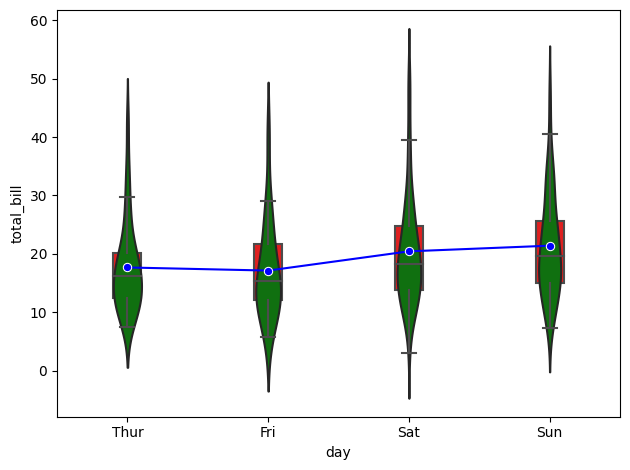

In [363]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example data
data = sns.load_dataset('tips')

# Create a line plot with each point represented as a box plot
sns.lineplot(x='day', y='total_bill', data=data, ci=None, marker='o', color='blue')

# Overlay box plots on the line
sns.boxplot(x='day', y='total_bill', data=data, color='red', width=0.2, showfliers=False)

# Overlay violin plots on the line
sns.violinplot(x='day', y='total_bill', data=data, color='green', width=0.2, inner=None)

# Adjust layout
plt.tight_layout()
plt.show()


In [331]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.collections import LineCollection

# Plot mean p-value vs sample size for each column
plt.figure(figsize=(12, 8))
# cols = ['RS4X_HUMAN', 'RL23_HUMAN', 'MYH10_HUMAN','RBMX_HUMAN']


# Dictionary to store unique column names and their corresponding colors
col_colors = {}

# for col in cols:
#     # Use a consistent color for each unique column name
#     if col not in col_colors:
#         col_colors[col] = plt.colormaps.get_cmap('tab10')(len(col_colors))

# Plot with a unique label for each column
plt.plot(sample_sizes, p_values[col], marker='D', label=f'{cols} (Real)', color='#003f5c', linestyle='-')
plt.plot(sample_sizes, p_values_pp[col], marker='o', label=f'{cols} (PP)', color='#7a5195', linestyle='-')
plt.plot(sample_sizes, p_values_co[col], marker='s', label=f'{cols} (CO)', color='#ef5675', linestyle='dashed')
plt.plot(sample_sizes, p_values_tvae[col], marker='D', label=f'{cols} (TVAE)', color='#ffa600', linestyle=':')

# Legend with unique labels, colors, linestyles, and markers for each linestyle
# legend_labels = [f'{col} (PP)' for col in cols] + [f'{col} (CO)' for col in cols] + [f'{col} (TVAE)' for col in cols]
# handles = [Line2D([0], [0], marker='o', color=col_colors[col], linestyle='-', label=label) for col, label in zip(cols, legend_labels)] + \
#           [Line2D([0], [0], marker='s', color=col_colors[col], linestyle='dashed', label=label) for col, label in zip(cols, legend_labels)] + \
#           [Line2D([0], [0], marker='D', color=col_colors[col], linestyle=':', label=label) for col, label in zip(cols, legend_labels)]

# plt.legend(handles=handles, loc='upper right', bbox_to_anchor=(1.25, 1))
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

plt.xlabel('Sample Size')
plt.ylabel('P-Value')
plt.title('Mean P-Value vs Sample Size for BioReplicate Comparison')

plt.show()



TypeError: list indices must be integers or slices, not str

<Figure size 1200x800 with 0 Axes>

In [370]:
df.T

,DHX15_HUMAN,G3P_HUMAN,HSPB1_HUMAN,ENOA_HUMAN,NPM_HUMAN,HS90A_HUMAN,HNRPC_HUMAN,HS90B_HUMAN,ANXA5_HUMAN,H14_HUMAN,...,HNRPM_HUMAN,RS23_HUMAN,TYB10_HUMAN,RS4X_HUMAN,H4_HUMAN,RL23_HUMAN,HNRPU_HUMAN,PSME1_HUMAN,EF1A1_HUMAN,PARK7_HUMAN
5,"[0.9962609114998892, 0.6570051811261975, 0.386...","[0.20407804301696583, 0.012404339617795112, 0....","[0.28066372867944733, 0.32944756297108985, 0.5...","[0.013837652842511372, 0.08940827091296955, 0....","[0.36184928344114725, 0.21851608607718664, 0.0...","[0.1204061832175303, 0.2064002414059338, 0.206...","[0.464790413615685, 0.7023956088129543, 0.7023...","[0.7313149509715939, 0.7313149509715939, 0.905...","[0.1693071445897082, 0.22972758045231081, 0.22...","[0.9894106046727155, 0.6761137096373352, 0.430...",...,"[0.5760150641488402, 0.41789403408070636, 0.89...","[0.99532696885086, 0.9367960699716897, 0.54168...","[0.716420201983032, 0.5551633964275693, 0.6583...","[0.639339589281581, 0.31626692310965543, 0.647...","[0.632151337163894, 0.16492631033647923, 0.753...","[0.6760696659768499, 0.6882112203902986, 0.784...","[0.6538068086044535, 0.39928142571825986, 0.20...","[0.7842617442775024, 0.6055429524551795, 0.605...","[0.6731190878401329, 0.3834927930758564, 0.310...","[0.0927636820338321, 0.4791950795823911, 0.447..."
10,"[0.6771559946277068, 0.30996593775031717, 0.25...","[0.013546014243117998, 0.0020326495022634527, ...","[0.08624393122852116, 0.022597614852571724, 0....","[0.00650170502282707, 0.0020148279643789455, 0...","[0.6016993204965667, 0.04778447183211087, 0.02...","[0.0027735988750176317, 0.04661721420796364, 0...","[0.21633922077391823, 0.9364951532254573, 0.93...","[0.749276038660508, 0.7961563851556969, 0.8466...","[0.005169072138949636, 0.007234753570077364, 0...","[0.383687739382136, 0.6726211844930329, 0.2755...",...,"[0.22112637124131249, 0.18539840256370524, 0.3...","[0.6973972212756149, 0.9219143335043457, 0.524...","[0.39796132589222816, 0.2860599921411927, 0.92...","[0.08626201078948456, 0.42186700505679264, 0.7...","[0.40381698525027027, 0.37004027649966464, 0.6...","[0.12617163232833675, 0.2607305838920097, 0.38...","[0.27608333920843425, 0.1498346447447922, 0.01...","[0.5000385756315158, 0.4025851394675004, 0.943...","[0.46806046800290885, 0.4691479019511117, 0.30...","[0.00248188870294098, 0.6481925543967676, 0.09..."
15,"[0.9687348190453332, 0.3431383622283075, 0.227...","[0.0007157394284501673, 0.00021675563074661854...","[0.04547838704211565, 0.017330115218767567, 0....","[0.026194240365400044, 0.00029271018787133536,...","[0.18841220185945004, 0.0069977177381908345, 0...","[0.000273385470685399, 0.0028854102474101645, ...","[0.13966705010854613, 0.7342436316118593, 0.43...","[0.47501961491936934, 0.7073554440120499, 0.85...","[0.0007909463956347558, 0.0014926336333061139,...","[0.34879747992108573, 0.9142588640114242, 0.45...",...,"[0.5150003387402738, 0.08551138696535585, 0.06...","[0.6644327619344735, 0.7118355388093065, 0.131...","[0.25463407049466996, 0.22356599276312306, 0.6...","[0.09919485507813826, 0.3242213825262665, 0.30...","[0.21865172149508488, 0.07984076403908773, 0.5...","[0.055565480368563465, 0.055565480368563465, 0...","[0.025034611608288713, 0.02845996380773125, 0....","[0.6145497307649885, 0.5623587230768542, 0.253...","[0.930487499043001, 0.39825956903522564, 0.160...","[0.002490034283501757, 0.18886719885266795, 0...."
20,"[0.7560238350508689, 0.321855490980506, 0.0560...","[7.040175521642964e-06, 1.3655270053063913e-05...","[0.011274601924183204, 0.01672652197305907, 0....","[0.014635704617923252, 0.0013520907050934767, ...","[0.08043086053483987, 0.0013442504050506872, 1...","[6.944678406569652e-05, 0.004196646233154457, ...","[0.20275297653646365, 0.6629900309648363, 0.20...","[0.7672387212051738, 0.6539393218734975, 0.895...","[0.00010354137077484201, 0.0001068967564457729...","[0.14373213662227655, 0.6134403188943645, 0.17...",...,"[0.37000534680264585, 0.063532906858259, 0.271...","[0.34890855320310704, 0.43578244908863667, 0.0..

In [329]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.collections import LineCollection

# Plot mean p-value vs sample size for each column
plt.figure(figsize=(12, 8))
# cols = ['RS4X_HUMAN', 'RL23_HUMAN', 'MYH10_HUMAN','RBMX_HUMAN']
cols = ['CALR_HUMAN']

# Dictionary to store unique column names and their corresponding colors
col_colors = {}

# for col in cols:
#     # Use a consistent color for each unique column name
#     if col not in col_colors:
#         col_colors[col] = plt.colormaps.get_cmap('tab10')(len(col_colors))

# Plot with a unique label for each column
plt.plot(sample_sizes, p_values[col], marker='D', label=f'{col} (Real)', color='Red', linestyle='-')
plt.plot(sample_sizes, p_values_pp[col], marker='o', label=f'{col} (PP)', color='Blue', linestyle='-')
plt.plot(sample_sizes, p_values_co[col], marker='s', label=f'{col} (CO)', color='Orange', linestyle='dashed')
plt.plot(sample_sizes, p_values_tvae[col], marker='D', label=f'{col} (TVAE)', color='Black', linestyle=':')

# Legend with unique labels, colors, linestyles, and markers for each linestyle
# legend_labels = [f'{col} (PP)' for col in cols] + [f'{col} (CO)' for col in cols] + [f'{col} (TVAE)' for col in cols]
# handles = [Line2D([0], [0], marker='o', color=col_colors[col], linestyle='-', label=label) for col, label in zip(cols, legend_labels)] + \
#           [Line2D([0], [0], marker='s', color=col_colors[col], linestyle='dashed', label=label) for col, label in zip(cols, legend_labels)] + \
#           [Line2D([0], [0], marker='D', color=col_colors[col], linestyle=':', label=label) for col, label in zip(cols, legend_labels)]

# plt.legend(handles=handles, loc='upper right', bbox_to_anchor=(1.25, 1))
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

plt.xlabel('Sample Size')
plt.ylabel('P-Value')
plt.title('Mean P-Value vs Sample Size for BioReplicate Comparison')

plt.show()


TypeError: list indices must be integers or slices, not str

<Figure size 1200x800 with 0 Axes>

In [332]:
p_values

[array([0.00821425, 0.17344916, 0.08124427, 0.00262409, 0.03145138,
        0.00530017, 0.45578438, 0.23409092, 0.00295162, 0.60107936,
        0.94067482, 0.05986422, 0.02175852, 0.00362733, 0.00205337,
        0.01673476, 0.22886312, 0.25808055, 0.00131937, 0.02740402,
        0.04135588, 0.03316797, 0.00149686, 0.02585227, 0.63849893,
        0.00310483, 0.69451217, 0.14465256, 0.70761261, 0.04086299,
        0.02252513, 0.20264453, 0.15842703]),
 array([0.00821425, 0.17344916, 0.08124427, 0.00262409, 0.03145138,
        0.00530017, 0.45578438, 0.23409092, 0.00295162, 0.60107936,
        0.94067482, 0.05986422, 0.02175852, 0.00362733, 0.00205337,
        0.01673476, 0.22886312, 0.25808055, 0.00131937, 0.02740402,
        0.04135588, 0.03316797, 0.00149686, 0.02585227, 0.63849893,
        0.00310483, 0.69451217, 0.14465256, 0.70761261, 0.04086299,
        0.02252513, 0.20264453, 0.15842703]),
 array([0.00821425, 0.17344916, 0.08124427, 0.00262409, 0.03145138,
        0.00530017, 0.45

In [330]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Parameters
num_simulations = 5
alpha = 0.05
max_sample_size = 50
step_size = 5

# Initialize lists to store results
sample_sizes = list(range(5, max_sample_size + 1, step_size))
# p_values = {col: [] for col in real_data.columns[:-1]}
# p_values_co = {col: [] for col in real_data.columns[:-1]}
# p_values_pp = {col: [] for col in real_data.columns[:-1]}
# p_values_tvae = {col: [] for col in real_data.columns[:-1]}
p_values = []
p_values_co = []
p_values_pp = []
p_values_tvae = []

mel = pd.read_csv('meldataclean.csv')
mel = mel.drop('Unnamed: 0',axis = 1)
num_columns = len(mel.columns)-1
real_data = mel
num_columns = len(real_data.columns)-1

# Perform simulations with increasing sample size
for sample_size in sample_sizes:
    for _ in range(num_simulations):
        # Generate simulated data with balanced BioReplicate values
#         num_samples_per_group = sample_size // 2


        # Perform a two-sample t-test between BioReplicate 0 and BioReplicate 1 for each column

        simulated_data0_pp = pd.read_csv('mel/perprotein/mel0_pp_'+str(num_simulations)+'.csv')
        simulated_data1_pp = pd.read_csv('mel/perprotein/mel1_pp_'+str(num_simulations)+'.csv')
        simulated_data0_co = pd.read_csv('mel/copula/mel_gm_copula_'+str(num_simulations)+'.csv')
        simulated_data1_co = pd.read_csv('mel/copula/mel1_gm_copula_'+str(num_simulations)+'.csv')
        simulated_data0_tvae = pd.read_csv('mel/tvae/mel0_tvae_'+str(num_simulations)+'.csv')
        simulated_data1_tvae = pd.read_csv('mel/tvae/mel1_tvae_'+str(num_simulations)+'.csv')

        bio_replicate_0_pp = simulated_data0_pp[:sample_size]
        bio_replicate_1_pp = simulated_data1_pp[:sample_size]
        bio_replicate_0_co = simulated_data0_co[:sample_size]
        bio_replicate_1_co = simulated_data1_co[:sample_size]
        bio_replicate_0_tvae = simulated_data0_tvae[:sample_size]
        bio_replicate_1_tvae = simulated_data1_tvae[:sample_size]

        real_data0 = df_with_0[:sample_size]
        real_data1 = df_with_1[:sample_size]

        _, p_value = stats.ttest_ind(real_data0, real_data1)
        p_values.append(p_value)

        _, p_value_pp = stats.ttest_ind(bio_replicate_0_pp, bio_replicate_1_pp)
        p_values_pp.append(p_value_pp)
        _, p_value_co = stats.ttest_ind(bio_replicate_0_co, bio_replicate_1_co)
        p_values_co.append(p_value_co)
        _, p_value_tvae = stats.ttest_ind(bio_replicate_0_tvae, bio_replicate_1_tvae)
        p_values_tvae.append(p_value_tvae)



In [233]:
p_values_pp

[array([9.25618651e-01, 1.06755200e-01, 6.01285616e-01, 3.43272931e-04,
        1.82860977e-02, 2.16071184e-01, 3.47744880e-01, 1.33514023e-01,
        4.77661258e-03, 7.61738806e-01, 1.60769772e-02, 6.12722421e-01,
        7.02448070e-02, 5.64561546e-01, 8.24380628e-02, 8.36955664e-02,
        8.50482670e-01, 5.26055960e-02, 5.81842673e-02, 3.25648502e-01,
        4.03253826e-03, 1.02668845e-01, 7.53117062e-01, 2.40468406e-02,
        6.18866006e-01, 3.34429632e-01, 8.66982544e-02, 8.23635700e-01,
        8.55616633e-01, 1.78073436e-01, 7.52199688e-01, 6.49456431e-01,
        4.10550190e-01]),
 array([9.25618651e-01, 1.06755200e-01, 6.01285616e-01, 3.43272931e-04,
        1.82860977e-02, 2.16071184e-01, 3.47744880e-01, 1.33514023e-01,
        4.77661258e-03, 7.61738806e-01, 1.60769772e-02, 6.12722421e-01,
        7.02448070e-02, 5.64561546e-01, 8.24380628e-02, 8.36955664e-02,
        8.50482670e-01, 5.26055960e-02, 5.81842673e-02, 3.25648502e-01,
        4.03253826e-03, 1.02668845e-01

In [145]:
p_value_pp<0.05

array([False,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True])

In [146]:
p_value<0.05

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [147]:
p_value_co<0.05

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True])

In [148]:
p_value_pp

array([6.21430089e-02, 7.34594548e-09, 9.22665374e-06, 4.38202316e-08,
       1.10478611e-11, 2.28214998e-08, 4.03384950e-03, 5.39828536e-01,
       3.95860689e-11, 1.21711887e-02, 1.81090555e-01, 3.69316195e-04,
       1.03707742e-07, 1.91547575e-04, 1.66457740e-04, 1.24771674e-03,
       4.06675796e-01, 7.23246328e-01, 2.51490890e-17, 4.16110539e-02,
       3.28820141e-06, 2.10996576e-04, 8.71191160e-05, 3.62128633e-02,
       5.12541499e-01, 7.47895761e-03, 1.41023686e-04, 9.20802825e-02,
       1.02200827e-02, 8.30401771e-07, 1.24736648e-04, 1.88193955e-02,
       1.94550610e-06])

In [156]:
real_data[p_value<0.05]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 34 but corresponding boolean dimension is 33

In [174]:
p_value<0.05

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [175]:
t_test_results.lt(0.05)

,0
DHX15_HUMAN,True
G3P_HUMAN,True
HSPB1_HUMAN,True
ENOA_HUMAN,True
NPM_HUMAN,True
HS90A_HUMAN,True
HNRPC_HUMAN,True
HS90B_HUMAN,False
ANXA5_HUMAN,True
H14_HUMAN,True


In [190]:
t_test_results = pd.DataFrame(index=real_data.columns[:-1])
t_test_results[0] = p_value
tp = t_test_results[t_test_results.le(significance_level).any(axis=1)].index
tn = t_test_results[t_test_results.gt(significance_level).any(axis=1)].index
print(t_test_results[t_test_results.le(significance_level).any(axis=1)].index)
print(len(t_test_results[t_test_results.le(significance_level).any(axis=1)].index))

Index(['DHX15_HUMAN', 'G3P_HUMAN', 'HSPB1_HUMAN', 'ENOA_HUMAN', 'NPM_HUMAN',
       'HS90A_HUMAN', 'HNRPC_HUMAN', 'HS90B_HUMAN', 'ANXA5_HUMAN', 'H14_HUMAN',
       'CH60_HUMAN', 'KPYM_HUMAN', 'ENPL_HUMAN', 'PGAM1_HUMAN', 'NUCL_HUMAN',
       'RL13_HUMAN', 'MYH10_HUMAN', 'RBMX_HUMAN', 'LPPRC_HUMAN', 'RL28_HUMAN',
       'SYAC_HUMAN', 'HNRPM_HUMAN', 'RS23_HUMAN', 'TYB10_HUMAN', 'RS4X_HUMAN',
       'H4_HUMAN', 'RL23_HUMAN', 'HNRPU_HUMAN', 'PSME1_HUMAN', 'EF1A1_HUMAN',
       'PARK7_HUMAN'],
      dtype='object')
31


In [191]:
len(t_test_results[t_test_results.le(significance_level).any(axis=1)].index)
significance_level

0.05

In [192]:
t_test_results = pd.DataFrame(index=real_data.columns[:-1])
t_test_results[0] = p_value_pp
ppp = t_test_results[t_test_results.le(significance_level).any(axis=1)].index
npp = t_test_results[t_test_results.gt(significance_level).any(axis=1)].index
print(t_test_results[t_test_results.le(significance_level).any(axis=1)].index)
print(len(t_test_results[t_test_results.le(significance_level).any(axis=1)].index))

Index(['G3P_HUMAN', 'HSPB1_HUMAN', 'ENOA_HUMAN', 'NPM_HUMAN', 'HS90A_HUMAN',
       'HNRPC_HUMAN', 'ANXA5_HUMAN', 'H14_HUMAN', 'KPYM_HUMAN', 'ENPL_HUMAN',
       'PGAM1_HUMAN', 'NUCL_HUMAN', 'RL13_HUMAN', 'MYH10_HUMAN', 'RBMX_HUMAN',
       'LPPRC_HUMAN', 'RL28_HUMAN', 'SYAC_HUMAN', 'HNRPM_HUMAN', 'TYB10_HUMAN',
       'RS4X_HUMAN', 'RL23_HUMAN', 'HNRPU_HUMAN', 'PSME1_HUMAN', 'EF1A1_HUMAN',
       'PARK7_HUMAN'],
      dtype='object')
26


In [193]:
t_test_results = pd.DataFrame(index=real_data.columns[:-1])
t_test_results[0] = p_value_co
pco = t_test_results[t_test_results.le(significance_level).any(axis=1)].index
nco = t_test_results[t_test_results.gt(significance_level).any(axis=1)].index
print(t_test_results[t_test_results.le(significance_level).any(axis=1)].index)
print(len(t_test_results[t_test_results.le(significance_level).any(axis=1)].index))

Index(['DHX15_HUMAN', 'G3P_HUMAN', 'HSPB1_HUMAN', 'ENOA_HUMAN', 'NPM_HUMAN',
       'HS90A_HUMAN', 'HNRPC_HUMAN', 'HS90B_HUMAN', 'ANXA5_HUMAN', 'H14_HUMAN',
       'CH60_HUMAN', 'KPYM_HUMAN', 'ENPL_HUMAN', 'PGAM1_HUMAN', 'NUCL_HUMAN',
       'RL13_HUMAN', 'MYH10_HUMAN', 'RBMX_HUMAN', 'LPPRC_HUMAN', 'RL28_HUMAN',
       'SYAC_HUMAN', 'HNRPM_HUMAN', 'TYB10_HUMAN', 'RS4X_HUMAN', 'H4_HUMAN',
       'RL23_HUMAN', 'HNRPU_HUMAN', 'PSME1_HUMAN', 'EF1A1_HUMAN',
       'PARK7_HUMAN'],
      dtype='object')
30


In [194]:
t_test_results = pd.DataFrame(index=real_data.columns[:-1])
t_test_results[0] = p_value_tvae
ptvae = t_test_results[t_test_results.le(significance_level).any(axis=1)].index
ntvae = t_test_results[t_test_results.gt(significance_level).any(axis=1)].index
print(t_test_results[t_test_results.le(significance_level).any(axis=1)].index)
print(len(t_test_results[t_test_results.le(significance_level).any(axis=1)].index))

Index(['DHX15_HUMAN', 'G3P_HUMAN', 'HSPB1_HUMAN', 'ENOA_HUMAN', 'NPM_HUMAN',
       'HS90A_HUMAN', 'HNRPC_HUMAN', 'ANXA5_HUMAN', 'H14_HUMAN', 'CH60_HUMAN',
       'KPYM_HUMAN', 'ENPL_HUMAN', 'PGAM1_HUMAN', 'NUCL_HUMAN', 'RL13_HUMAN',
       'MYH10_HUMAN', 'RBMX_HUMAN', 'LPPRC_HUMAN', 'RL28_HUMAN', 'SYAC_HUMAN',
       'HNRPM_HUMAN', 'RS23_HUMAN', 'TYB10_HUMAN', 'RS4X_HUMAN', 'H4_HUMAN',
       'RL23_HUMAN', 'HNRPU_HUMAN', 'PSME1_HUMAN', 'EF1A1_HUMAN',
       'PARK7_HUMAN'],
      dtype='object')
30


In [196]:
tp_pp = set(tp) & set(ppp)
tn_pp = set(tn) & set(npp)
fp_pp = set(ppp) & set(tn)
fn_pp = set(npp) & set(tp)


# Display results
print("True Positive:", list(tp_pp))
print("True Negative:", list(tn_pp))
print("false Positive:", list(fp_pp))
print("false Negative:", list(fn_pp))

True Positive: ['ANXA5_HUMAN', 'MYH10_HUMAN', 'HS90A_HUMAN', 'HNRPC_HUMAN', 'LPPRC_HUMAN', 'RL23_HUMAN', 'HNRPM_HUMAN', 'RL28_HUMAN', 'H14_HUMAN', 'RS4X_HUMAN', 'ENPL_HUMAN', 'TYB10_HUMAN', 'KPYM_HUMAN', 'NUCL_HUMAN', 'RBMX_HUMAN', 'PSME1_HUMAN', 'HNRPU_HUMAN', 'G3P_HUMAN', 'PARK7_HUMAN', 'HSPB1_HUMAN', 'SYAC_HUMAN', 'NPM_HUMAN', 'EF1A1_HUMAN', 'ENOA_HUMAN', 'RL13_HUMAN', 'PGAM1_HUMAN']
True Negative: ['S10AB_HUMAN', 'CALR_HUMAN']
false Positive: []
false Negative: ['CH60_HUMAN', 'HS90B_HUMAN', 'DHX15_HUMAN', 'RS23_HUMAN', 'H4_HUMAN']


In [229]:
num_simulations = 5
alpha = 0.05
max_sample_size = 50
step_size = 5

sample_sizes = list(range(5, max_sample_size + 1, step_size))
p_values_pp = {sample_size: [] for sample_size in sample_sizes}
for sample_size in sample_sizes:
    print(sample_size)
    for i in range(0,num_simulations):
        print(i)
        simulated_data0_pp = pd.read_csv('mel/perprotein/mel0_pp_'+str(i)+'.csv')
        simulated_data1_pp = pd.read_csv('mel/perprotein/mel1_pp_'+str(i)+'.csv')
        bio_replicate_0_pp = simulated_data0_pp[:sample_size]
        bio_replicate_1_pp = simulated_data1_pp[:sample_size]
        _, p_v = ttest_ind(bio_replicate_0_pp, bio_replicate_1_pp)
        print(p_v)
        rejected, adjusted_p_values, _, _ = multitest.multipletests(p_v, alpha=significance_level, method='fdr_bh')
        p_values_pp[sample_size].append(adjusted_p_values)

5
0
[9.79309321e-01 1.60788761e-01 1.10139262e-01 5.59097085e-04
 2.57041962e-01 2.69606523e-02 1.36150727e-01 1.03387168e-01
 8.55086589e-02 7.45802552e-01 1.25049001e-01 6.93285370e-01
 1.80013961e-01 5.95570928e-01 9.28004019e-01 4.61240490e-01
 5.91363543e-02 8.23724109e-01 2.75197605e-01 6.13688797e-02
 7.11863153e-01 2.18870469e-01 4.70183552e-01 4.24738381e-01
 8.86128535e-01 5.64452280e-01 4.84348174e-01 3.56579096e-01
 3.06572892e-01 4.93852540e-01 4.84463689e-01 4.07950962e-01
 2.81102067e-03]
1
[4.20209963e-01 3.75889079e-04 1.43093386e-01 2.25264988e-02
 1.05569029e-01 1.22337033e-01 4.87751533e-01 1.31015400e-01
 1.85972591e-01 2.94327141e-01 9.80716552e-01 5.24716271e-02
 3.70118084e-02 3.56351469e-02 1.88997997e-01 3.75147037e-01
 5.01731051e-01 4.70619733e-01 1.23593824e-01 5.46786563e-01
 7.26698346e-02 6.03170990e-01 5.18069630e-02 1.53975504e-01
 5.87127294e-01 3.47813992e-01 1.05422308e-01 2.48614163e-02
 5.12671439e-01 2.25856160e-01 2.32982135e-01 1.31693129e-01
 

[7.53916312e-01 6.56696304e-05 2.38080375e-02 2.97303176e-04
 9.84289171e-05 3.57408426e-08 1.64155024e-03 2.23394061e-01
 1.04771426e-04 1.06057955e-03 8.34216146e-02 4.78374446e-04
 7.95115657e-03 9.15148563e-03 5.57545029e-02 2.04830621e-02
 5.73762255e-01 3.15184574e-01 1.35620606e-06 2.90864988e-02
 3.52800258e-02 1.16867876e-02 1.13855919e-03 3.33116157e-02
 1.65643455e-01 4.39955810e-02 1.19994403e-01 9.09960637e-02
 5.15758377e-02 2.07837066e-02 9.21748428e-02 2.58875020e-02
 9.41439864e-03]
25
0
[1.42895427e-01 4.25561105e-07 2.86545652e-04 5.36870660e-04
 1.34760737e-02 7.34129202e-06 5.06906235e-02 6.91059853e-01
 3.32299555e-06 8.93820413e-03 4.16121161e-01 1.70202553e-01
 2.37227822e-04 1.60059830e-03 2.35053171e-02 1.46830155e-01
 3.71623483e-01 4.28685613e-01 1.00808373e-04 3.34261316e-02
 1.91242402e-02 1.10439989e-02 3.20903718e-02 1.06112195e-01
 1.97582686e-01 3.25508139e-02 1.83951615e-02 5.23560483e-03
 9.58966475e-04 1.33155564e-03 2.70378502e-01 1.59186269e-01
 2

[1.07486806e-02 6.12103496e-09 3.30345790e-04 2.08607210e-10
 4.13426565e-07 1.03811358e-05 1.76078109e-03 4.77972863e-02
 3.52513169e-09 1.06425291e-01 2.19164704e-02 4.74446197e-07
 7.75874788e-04 4.85399479e-06 6.12345116e-06 4.83509311e-04
 3.89962659e-01 3.78318496e-01 2.05808068e-06 1.99860532e-02
 2.62281187e-04 1.85236628e-05 2.54419382e-04 3.35699805e-02
 9.08539690e-02 4.92270823e-03 6.03536241e-02 9.25000102e-02
 1.70075677e-03 4.02590538e-07 8.24097440e-02 3.81011754e-03
 1.10456312e-03]
3
[3.67423762e-02 5.71560387e-13 3.01087821e-04 5.57483202e-08
 5.58669463e-08 4.13285819e-06 1.03071709e-01 5.31792425e-02
 3.63958823e-09 3.27996442e-01 6.39513099e-02 2.04449484e-01
 1.98696280e-03 2.98402092e-04 1.65215787e-05 1.84600498e-01
 3.53030694e-01 7.51126880e-01 1.36747587e-13 1.31549076e-03
 1.55358222e-05 8.50147861e-05 5.48832904e-04 2.75893382e-02
 3.96263911e-02 1.46718966e-03 1.58950189e-05 3.81596140e-05
 4.10504395e-03 1.24365853e-03 2.92415012e-06 4.50445700e-04
 4.89

In [230]:
p_values_pp

{5: [array([0.97930932, 0.48236628, 0.4492974 , 0.0184502 , 0.60543473,
         0.29656718, 0.4492974 , 0.4492974 , 0.4492974 , 0.84867187,
         0.4492974 , 0.83898157, 0.49503839, 0.75591695, 0.95700414,
         0.67904724, 0.40503461, 0.90609652, 0.60543473, 0.40503461,
         0.83898157, 0.55559427, 0.67904724, 0.67904724, 0.94329812,
         0.74507701, 0.67904724, 0.67904724, 0.63230659, 0.67904724,
         0.67904724, 0.67904724, 0.04638184]),
  array([0.55467715, 0.01240434, 0.31480545, 0.24427794, 0.31041952,
         0.31041952, 0.58338474, 0.31041952, 0.34649633, 0.46251408,
         0.98071655, 0.24736624, 0.24427794, 0.24427794, 0.34649633,
         0.51582718, 0.58338474, 0.58338474, 0.31041952, 0.60146522,
         0.29976307, 0.62202008, 0.24736624, 0.31757448, 0.62202008,
         0.51582718, 0.31041952, 0.24427794, 0.58338474, 0.38442052,
         0.38442052, 0.31041952, 0.51582718]),
  array([0.31887209, 0.23927675, 0.58425673, 0.23927675, 0.20433249,
      